**Whose name is the most, least or rarest in the Muteham Family?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource
from bokeh.models import NumeralTickFormatter
from bokeh.io import output_notebook
import seaborn as sns
%matplotlib inline
output_notebook()

Loading BokehJS ...

In [2]:
#Setup family
females = ["Sarah"]
males= ["Jason","Leon","Conrad"]

In [3]:
#Create some lists to select or reformat data later
count_cols = []
rank_cols = []
years = []
for f in range(1996,2022):
    count_cols.append(str(f) + ' Count')
    rank_cols.append(str(f) + ' Rank')
    years.append(str(f))
#years = list(years)

In [4]:
#Import ONS data
df1 = pd.read_excel("babynames1996to2021.xlsx","1",skiprows=7)
df2 = pd.read_excel( 'babynames1996to2021.xlsx',"2",skiprows=7)
df1 = df1.set_index("Name")
df2 = df2.set_index("Name")


In [5]:
#Replace NaN with 0
df1 = df1.replace("[x]",0)
df2 = df2.replace("[x]",0)


In [6]:
#Filter names from ONS data
Girls = df2.loc[females]
Boys = df1.loc[males]
df_family = pd.concat([Girls, Boys], axis=0)


In [7]:
df_family_counts = df_family.drop(columns=rank_cols)
df_family_ranks = df_family.drop(columns=count_cols)

In [8]:
df_family_counts.columns = df_family_counts.columns.str.replace(" Count","")
df_family_ranks.columns = df_family_ranks.columns.str.replace(" Rank","")


In [9]:

df_family_counts = pd.pivot_table(df_family_counts, values = years, columns=["Name"])
df_family_counts.index.name = "Year"
df_family_ranks = pd.pivot_table(df_family_ranks, values = years, columns=["Name"])
df_family_ranks.index.name = "Year"

In [10]:
# create a new plot with a title and axis labels
source = ColumnDataSource(df_family_counts)
p = figure(title="Name rankings", x_axis_label="Year", y_axis_label="Babies Named",x_range=years, width=900, height=480)

# add a line renderer with legend and line thickness
p.line(x = "Year", y = "Jason", legend_label="Jason", line_width=2,source=source)
p.line(x = "Year", y = "Sarah", legend_label="Sarah", line_color="red",line_width=2,source=source)
p.line(x = "Year", y = "Leon", legend_label="Leon", line_color="yellow",line_width=2,source=source)
p.line(x = "Year", y = "Conrad", legend_label="Conrad", line_color="darkgrey",line_width=2,source=source)

# show the results
show(p)

In [11]:
# create a new plot with a title and axis labels
source = ColumnDataSource(df_family_ranks)
p = figure(title="Name rarity", x_axis_label="Year", y_axis_label="Name UK rank",x_range=years, width=900, height=480)

# add a line renderer with legend and line thickness
p.line(x = "Year", y = "Jason", legend_label="Jason", line_width=2,source=source)
p.line(x = "Year", y = "Sarah", legend_label="Sarah", line_color="red",line_width=2,source=source)
p.line(x = "Year", y = "Leon", legend_label="Leon", line_color="yellow",line_width=2,source=source)
p.line(x = "Year", y = "Conrad", legend_label="Conrad", line_color="darkgrey",line_width=2,source=source)

# show the results
show(p)

In [12]:
df_family_ranks.tail(12)

Name,Conrad,Jason,Leon,Sarah
Year,,,,
2010,536,161,60,83
2011,576,159,62,90
2012,734,165,72,95
2013,611,155,75,96
2014,714,162,85,95
2015,779,163,85,96
2016,870,170,92,96
2017,861,179,98,103
2018,851,174,97,103


In [13]:
df_family_counts.tail(12)


Name,Conrad,Jason,Leon,Sarah
Year,,,,
2010,64,344,1204,722
2011,61,360,1069,663
2012,45,359,918,592
2013,56,372,837,574
2014,45,353,765,601
2015,41,355,795,581
2016,36,340,737,572
2017,36,314,669,530
2018,36,311,655,503


<AxesSubplot:title={'center':'Name rankings'}, xlabel='Year'>

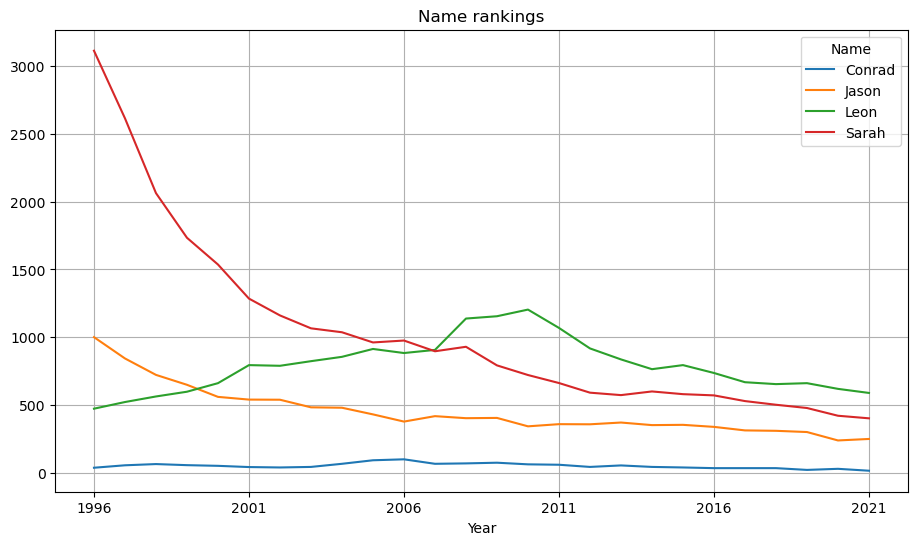

In [14]:
df_family_counts.plot(title="Name rankings",figsize=(11,6),grid=True)

[Text(0.5, 1.0, 'Name rankings')]

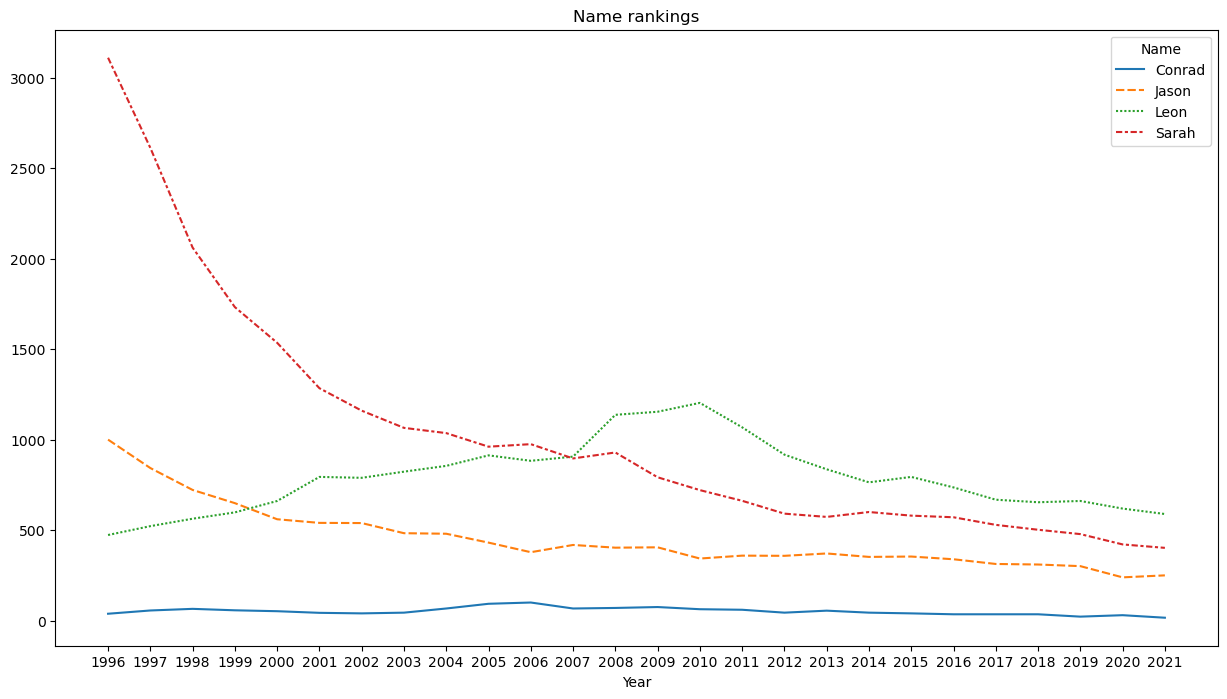

In [15]:
fig, ax = plt.subplots(figsize=(15, 8))
sns.lineplot(df_family_counts).set(title="Name rankings")

<AxesSubplot:title={'center':'Total Births'}, xlabel='Years'>

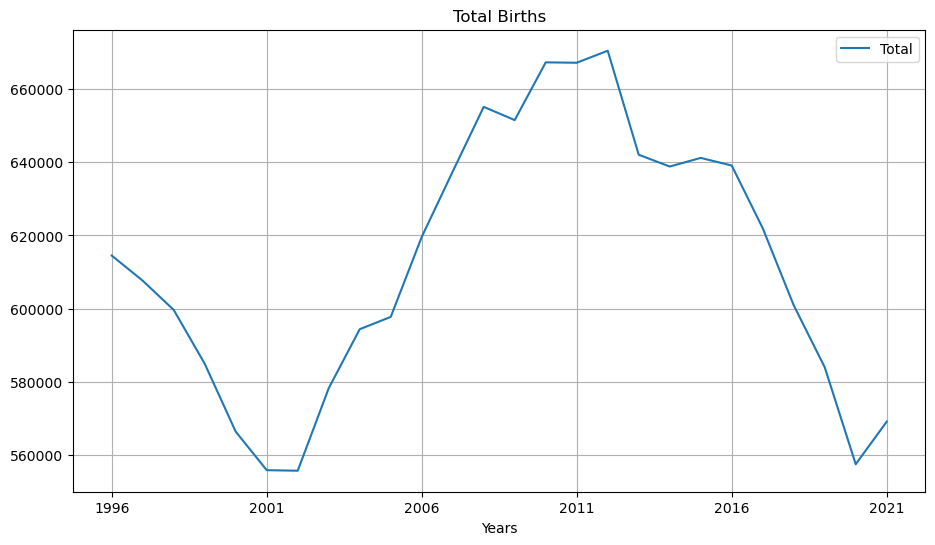

In [16]:
df1_totals = df1.drop(columns=rank_cols).sum()
df2_totals = df2.drop(columns=rank_cols).sum()
df1_totals = df1_totals.reset_index()
df2_totals = df2_totals.reset_index()
df_totals = pd.concat([df1_totals, df2_totals], axis=0)
df_totals = df_totals.replace(count_cols,years)
#df_totals = df1_totals + df2_totals
df_totals.columns=["Years","Total"]
df_totals = df_totals.groupby("Years").sum()

df_totals.plot(title="Total Births",figsize=(11,6),grid=True)